# Physics 512 -  Problem Set 6

Kit M. Gerodias

In [1]:
#[ Modules ]

import numpy as np
from matplotlib import pyplot as plt
import time

#from test_broken_libc.py
import ctypes
import numba as nb

# Problem No. 1

In [2]:
#[ input data ]
#from C
file = np.loadtxt("rand_points.txt")
xdata = file[:,0]
ydata = file[:,1]
zdata = file[:,2]

#from python
file2 = np.loadtxt("rand_points_v2.txt")
xdata2 = file2[:,0]
ydata2 = file2[:,1]
zdata2 = file2[:,2]

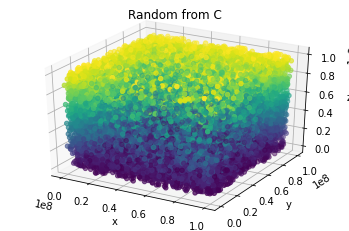

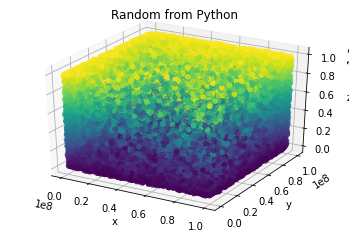

In [3]:
#[ 3D plot ]

ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=zdata)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Random from C')
plt.show()

ax = plt.axes(projection='3d')
ax.scatter3D(xdata2, ydata2, zdata2, c=zdata2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Random from Python')
plt.show()

In [46]:
#equation of a plane
#https://en.wikipedia.org/wiki/Plane_(geometry)
#see method 1 of the wiki site

def planeEquation(p1_arr, p2_arr, p3_arr, p4_arr):
    
    x = p4_arr[0]
    y = p4_arr[1]
    z = p4_arr[2]
    
    x1 = p1_arr[0]
    y1 = p1_arr[1]
    z1 = p1_arr[2]
    
    x2 = p2_arr[0]
    y2 = p2_arr[1]
    z2 = p2_arr[2]
    
    x3 = p3_arr[0]
    y3 = p3_arr[1]
    z3 = p3_arr[2]
    
    matrix = np.array([[x-x1, y-y1, z-z1],
                       [x-x2, y-y2, z-z2],
                       [x-x3, y-y3, z-z3]])
    #print(matrix)
    
    return np.linalg.det(matrix)

In [61]:
#determine coplanar triples

start = time.time()
cnt_mat = []
for j in range(100):
    #random three points to form a plane
    rdm_idx = np.random.choice(np.arange(len(file)),size=3,replace=False)
    cnt = 0
    if_cnt = 0
    else_cnt = 0
    for i in range(len(file)):
        if i==rdm_idx[0] or i==rdm_idx[1] or i==rdm_idx[2]:
            #avoid iterating the selected points
            i_cnt +=1
        else:
            #get determinant
            det = planeEquation(file[rdm_idx[0]], file[rdm_idx[1]], file[rdm_idx[2]], file[i])
            else_cnt += 1
            if det == 0:
                cnt += 1
    cnt_mat.append(cnt)    
    
        
print("runtime:", time.time()-start)
print("For 100 randomly selected planes, one plane has", max(cnt_mat)+3,  "coplanar points.")

runtime: 59.94722890853882
For 100 randomly selected planes, one plane has 9 coplanar points.


In [66]:
#from test_broken_libc.py

#mylib=ctypes.cdll.LoadLibrary("libc.dylib") #Linux
#path_libc = ctypes.util.find_library("msvcrt")
mylib = ctypes.cdll.LoadLibrary("msvcrt") #windows
rand=mylib.rand
rand.argtypes=[]
rand.restype=ctypes.c_int


@nb.njit
def get_rands_nb(vals):
    n=len(vals)
    for i in range(n):
        vals[i]=rand()
    return vals

def get_rands(n):
    vec=np.empty(n,dtype='int32')
    get_rands_nb(vec)
    return vec


n=300000000
vec=get_rands(n*3)
#vv=vec&(2**16-1)

vv=np.reshape(vec,[n,3])
vmax=np.max(vv,axis=1)

maxval=1e8
vv2=vv[vmax<maxval,:]

f=open('rand_points_v2.txt','w')
for i in range(vv2.shape[0]):
    myline=repr(vv2[i,0])+' '+repr(vv2[i,1])+' '+ repr(vv2[i,2])+'\n'
    f.write(myline)
f.close()


MemoryError: 

In [88]:
#python random generator using np.random.randint()

@nb.njit
def get_rands_nb(vals):
    n=len(vals)
    for i in range(n):
        vals[i]=np.random.randint(n)
    return vals

def get_rands(n):
    vec=np.empty(n,dtype='int32')
    get_rands_nb(vec)
    return vec


n=300000000
vec=get_rands(n*3)
#vv=vec&(2**16-1)

vv=np.reshape(vec,[n,3])
vmax=np.max(vv,axis=1)

maxval=1e8
vv2=vv[vmax<maxval,:]

f=open('rand_points_v2.txt','w')
for i in range(vv2.shape[0]):
    myline=repr(vv2[i,0])+' '+repr(vv2[i,1])+' '+ repr(vv2[i,2])+'\n'
    f.write(myline)
f.close()

In [95]:
#[ python random generator ]

file2 = np.loadtxt("rand_points_v2.txt")
xdata2 = file2[:,0]
ydata2 = file2[:,1]
zdata2 = file2[:,2]

#determine coplanar triples

start = time.time()
cnt_mat = []
for j in range(100):
    #random three points to form a plane
    rdm_idx = np.random.choice(np.arange(len(file)),size=3,replace=False)
    cnt = 0
    if_cnt = 0
    else_cnt = 0
    for i in range(len(file)):
        if i==rdm_idx[0] or i==rdm_idx[1] or i==rdm_idx[2]:
            #avoid iterating the selected points
            i_cnt +=1
        else:
            #get determinant
            det = planeEquation(file[rdm_idx[0]], file[rdm_idx[1]], file[rdm_idx[2]], file[i])
            else_cnt += 1
            if det == 0:
                cnt += 1
    cnt_mat.append(cnt)
    
        
print("runtime:", time.time()-start)
print("For 100 randomly selected planes, one plane has", max(cnt_mat)+3,  "coplanar points.")

runtime: 45.56966185569763
For 100 randomly selected planes, one plane has 13 coplanar points.


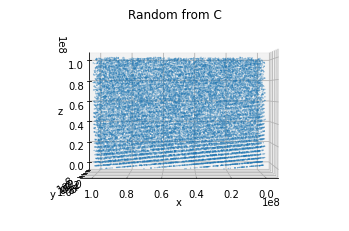

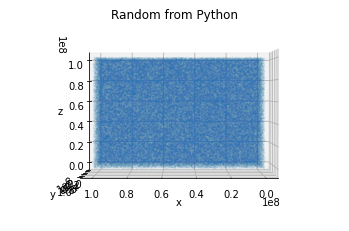

In [28]:
#[ 3D plot ]

ax = plt.axes(projection='3d')
ax.view_init(1,90)
ax.scatter3D(xdata, ydata, zdata, s=0.05)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Random from C")
plt.show()

ax = plt.axes(projection='3d')
ax.view_init(1,90)
ax.scatter3D(xdata2, ydata2, zdata2, s=0.0005)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Random from Python")
plt.show()

In [96]:
print("c random generator triples:", len(file))
print("python random generator triples:",len(file2))

c random generator triples: 30253
python random generator triples: 412371


From the C random generator datapoints, a certain plane has 9 coplanar triples. Using np.random.randint(n) datapoints, a certain plane has 13 coplanar triples. Although this might not be a good comparison since for C, there are only 30253 triples compared to python which has 412371 triples. However, when we compare the graphs, we see an apparent layering from the C-random graph compared to the Python-random graph.

# Problem No. 2

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


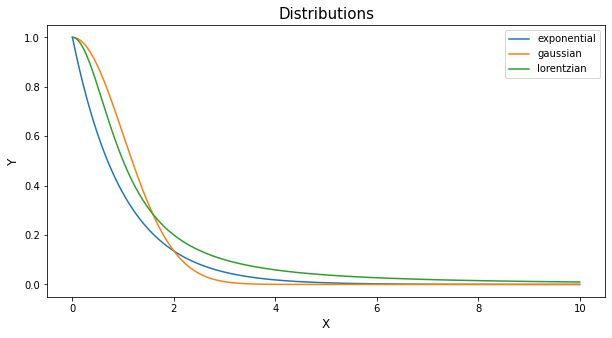

In [2]:
#[ compare distributions]

x = np.linspace(0,10,1001)
y_exp = np.exp(-x)
alpha = -3
y_power = x**alpha
#y_power = y_power/max(y_power)
y_gauss = np.exp(-0.5*x**2)
y_lorentz = 1/(1+x**2)
plt.figure(figsize=(10,5))
plt.plot(x,y_exp, label = 'exponential')
#plt.plot(x,y_power, label = 'power, alpha={}'.format(alpha))
plt.plot(x,y_gauss, label = 'gaussian')
plt.plot(x,y_lorentz, label = 'lorentzian')
plt.title("Distributions", fontsize = 15, loc='center')
plt.xlabel("X",fontsize=12)
plt.ylabel("Y",fontsize=12)
plt.legend()
plt.show()


Using the Lorentzian since it is a better shape than Gaussian. Power law value shots up depending on the step size, clearly not a good choice.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  


accept fraction was 0.817816


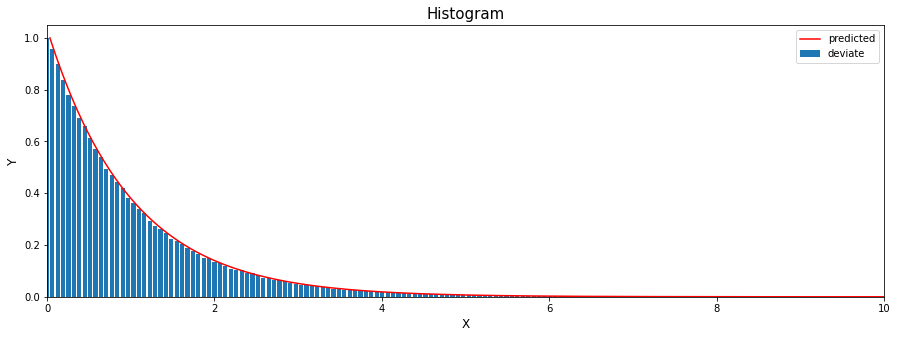

In [83]:
#code from and based from class

def lorentz_dev(n):
    x = np.random.rand(n)
    return np.tan(np.pi*(x-0.5))

def exp_from_lorentz(x):
    accept_prob = np.exp(-x)/(1/(1+x**2))
    #print(accept_prob.max())
    accept = np.random.rand(len(accept_prob)) < accept_prob
    return x[accept]

n = 1000000
y = lorentz_dev(n)
z = exp_from_lorentz(y)

print("accept fraction was", len(z)/len(y))


#histogram plot
zz = z[np.abs(z)<20]
a,b = np.histogram(zz,500)
bb = 0.5*(b[1:] + b[:-1])
pred = np.exp(-bb)
pred = pred/pred.max()

plt.figure(figsize=(15,5))
plt.bar(bb,a/a.max(), width=0.05, label = 'deviate')
plt.plot(bb+20, pred, 'r', label = 'predicted')
plt.title("Histogram", fontsize = 15, loc='center')
plt.xlabel("X",fontsize=12)
plt.ylabel("Y",fontsize=12)
plt.legend()
plt.xlim(0,10)
#plt.ylim(0,0.025)
plt.show()

# Problem No. 3

accept fraction is 0.749868


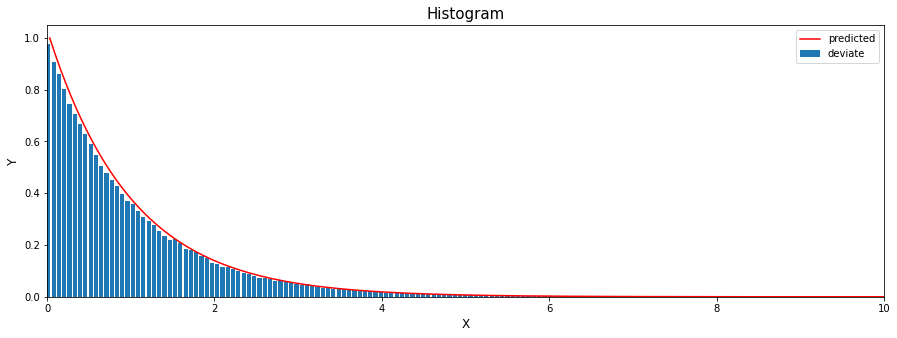

In [108]:
#code from class
n = 1000000
u = np.random.rand(n)
v = 2*np.random.rand(n)-1

rat = v/u
accept = u < np.sqrt(np.exp(-rat))
my_exp = rat[accept]
print("accept fraction is", np.mean(accept)) 

#xx=np.random.randn(len(my_exp)) #predicted

#histogram plot
zz = my_exp[np.abs(my_exp)<20]
a,b = np.histogram(zz,500)
bb = 0.5*(b[1:] + b[:-1])
pred = np.exp(-bb)
pred = pred/pred.max()

plt.figure(figsize=(15,5))
plt.bar(bb,a/a.max(), width=0.05, label = 'deviate')
plt.plot(bb+20, pred, 'r', label = 'predicted')
plt.title("Histogram", fontsize = 15, loc='center')
plt.xlabel("X",fontsize=12)
plt.ylabel("Y",fontsize=12)
plt.legend()
plt.xlim(0,10)
#plt.ylim(0,0.025)
plt.show()